<a href="https://colab.research.google.com/github/AStefanija/Calculator/blob/main/Copy_of_Laboratory_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



 add your answers here

 Веб сајтот што јас ќе го користам за оваа лабораториска вежба е reklama5.mk.
 Податоците што ќе ги обработам ќе бидат со атрибути наслов, цена и град. Се со цел долку некој сака да купи нешто полесно да мозе да се снајде со цена и локација, сметам дека тоа се атрибутите кои први ни паѓаат на памет кога купуваме нешто.

add your screenshot here

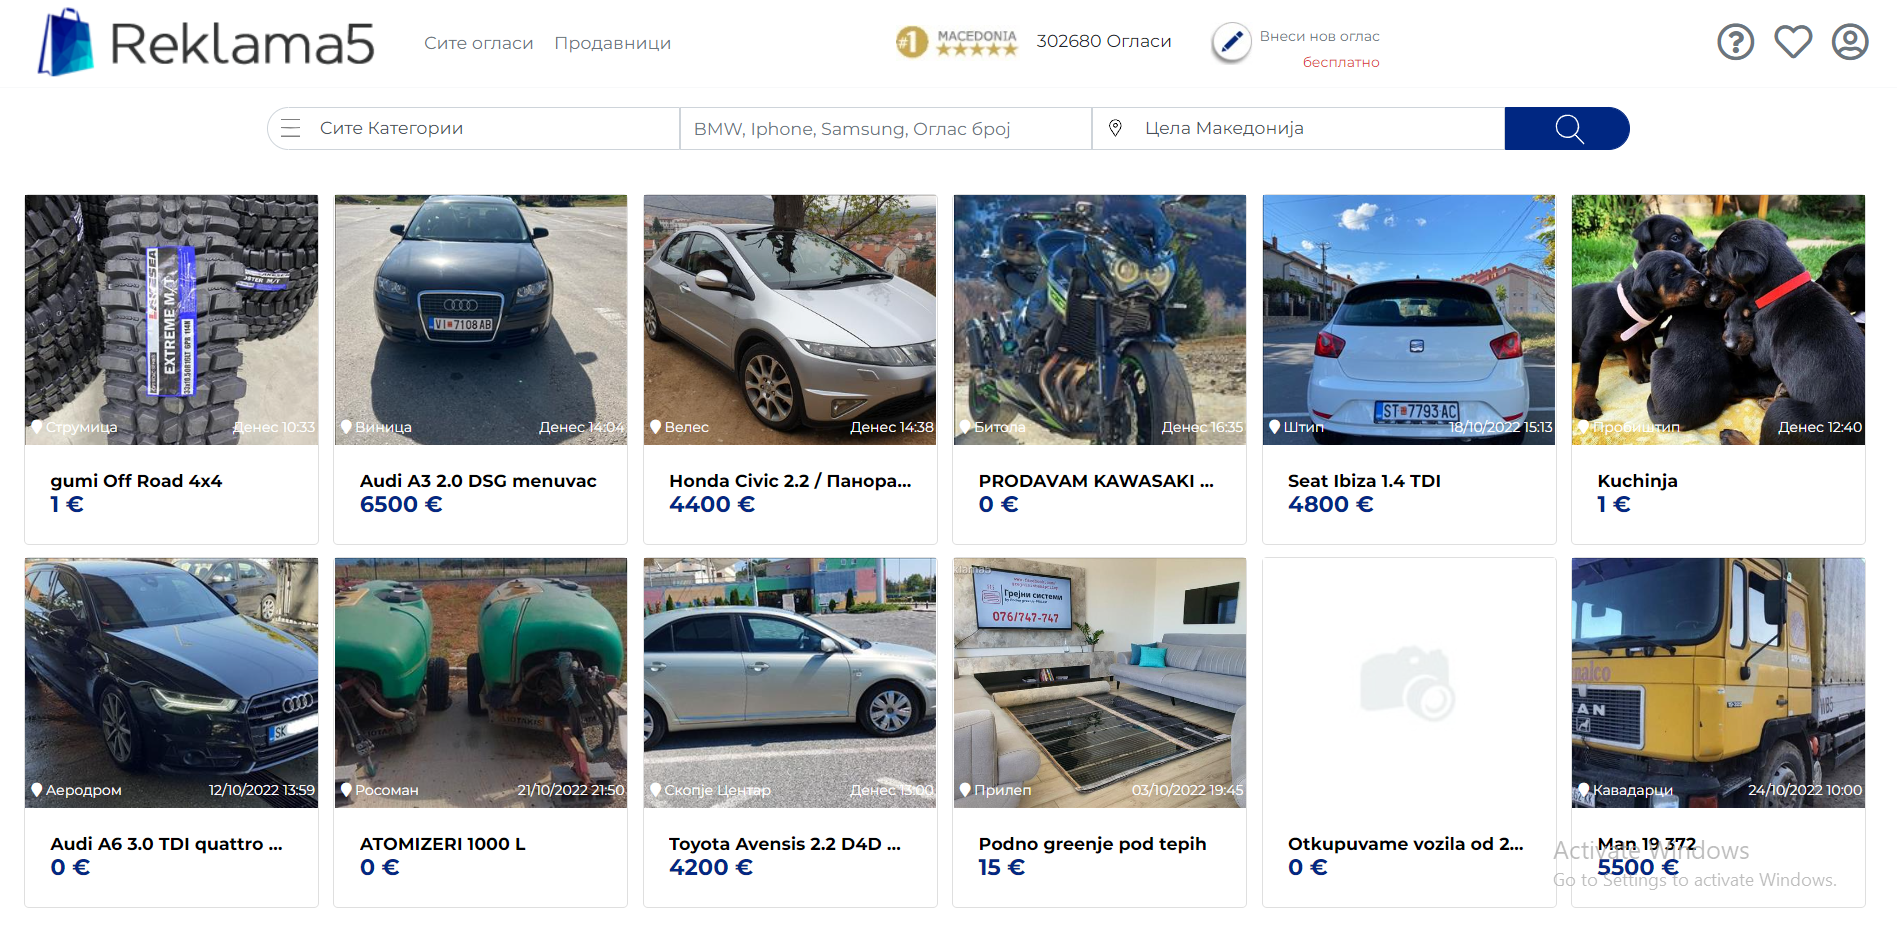

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....

import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup 
from IPython.display import HTML
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [ ]:
#add your code

url = 'https://reklama5.mk/'

response = requests.get(url)


**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code
response

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
#add your code

raw_html = response.text
raw_html[:500]   

html = BeautifulSoup(raw_html, "html.parser")




**Print the HTML code that you get**

In [ ]:
#add your code
html

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Oglasi | Reklama5.mk | Огласи | Автомобили | Недвижнини | Компјутери | Мобилн телефони | Услуги,Бизнис | Вработување | Реклами |</title>
<link href="/favicon.ico" rel="SHORTCUT ICON" type="image/vnd.microsoft.icon"/>
<link href="/favicon.ico" rel="icon" type="image/png"/>
<link href="/Content/css?v=QzLaHFBXrcD9k4hYZ0RklDOj_h-UXqxeZ7UhHn-RUdE1" rel="stylesheet">
<link href="/Content/Sidebar.css" rel="stylesheet" type="text/css"/>
<script src="/bundles/modernizr?v=wBEWDufH_8Md-Pbioxomt90vm6tJN2Pyy9u9zHtWsPo1"></script>
<script async="async" src="https://www.googletagservices.com/tag/js/gpt.js"></script>
<script>
            var cookieDomain = '.reklama5.mk';
    </script>
<script>
            var googletag = googletag || {};
            googletag.cmd = googletag.cmd || [];
        </script>
<script>
            googletag.cmd.push(function () {
                googletag.defineSlot('/21619973618/home-top-banner-970x90', [[970, 9

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`add your attributes here for building the dataset`

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code

post = html.select('.ad-tumbnail')
post[0]


<div class="card ad-tumbnail">
<div class="ad-info-container">
<img height="0px" src="//stats.reklama5.mk/pixel.gif?fkType=0&amp;fkNum=4466738&amp;type=imp" style="display:none" widht="0px'"/>
<div class="ad-image" style="background-image:url(//reklama5.mk/photos/big/f37dfa6c-07ed-4cfb-b48b-a2f2290f53a9.jpg)"></div>
<div class="r5-slider-prev">
<i aria-hidden="true" class="fa fa-angle-left"></i>
</div>
<div class="r5-slider-next">
<i aria-hidden="true" class="fa fa-angle-right"></i>
</div>
<div class="ad-image-text">
<span><small><i aria-hidden="true" class="fa fa-map-marker"></i> Битола</small></span>
<span style="float:right">
<small>Денес 16:35</small>
</span>
</div>
</div>
<div class="ad-promoted-link" href="/AdDetails?ad=4466738">
<div class="card-body ad-promo-caption">
<h5>PRODAVAM KAWASAKI Z800 2016 GODINA </h5>
<h3>0 €</h3>
</div>
</div>
</div>

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code
len(post)

12

In [ ]:
post[0].prettify()

'<div class="card ad-tumbnail">\n <div class="ad-info-container">\n  <img height="0px" src="//stats.reklama5.mk/pixel.gif?fkType=0&amp;fkNum=4466738&amp;type=imp" style="display:none" widht="0px\'"/>\n  <div class="ad-image" style="background-image:url(//reklama5.mk/photos/big/f37dfa6c-07ed-4cfb-b48b-a2f2290f53a9.jpg)">\n  </div>\n  <div class="r5-slider-prev">\n   <i aria-hidden="true" class="fa fa-angle-left">\n   </i>\n  </div>\n  <div class="r5-slider-next">\n   <i aria-hidden="true" class="fa fa-angle-right">\n   </i>\n  </div>\n  <div class="ad-image-text">\n   <span>\n    <small>\n     <i aria-hidden="true" class="fa fa-map-marker">\n     </i>\n     Битола\n    </small>\n   </span>\n   <span style="float:right">\n    <small>\n     Денес 16:35\n    </small>\n   </span>\n  </div>\n </div>\n <div class="ad-promoted-link" href="/AdDetails?ad=4466738">\n  <div class="card-body ad-promo-caption">\n   <h5>\n    PRODAVAM KAWASAKI Z800 2016 GODINA\n   </h5>\n   <h3>\n    0 €\n   </h3>\n 

In [ ]:
HTML(post[0].prettify())

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
titles = []

for i in range(0, len(post)):
  titles.append(post[i].select_one('h5').text)

titles



['PRODAVAM KAWASAKI Z800 2016 GODINA ',
 'PEUGEOT BOXER 8+1 2008g',
 'Alfa 147 1.9 JTDM',
 'MAN TGA 18.440 KRAN ATLAS',
 'Audi A3 2.0 DSG menuvac ',
 'Цитроен ц5 хидроактив',
 'Peugeot 5008 1.6e-hdi 120ks 7sedista Allure!!!',
 'Katerplilar 4c vo odlična sostojba',
 'Шкода Фелиција',
 'Продавам OPEL ASTRA 1.9CDTI',
 'Se prodavaat zvuci JBL TR ',
 'Itno ce prodava stanot vo strog centar']

**Print all lists that are containing the elements**

In [ ]:
#add your code
#prices = html.find_all("h3")
#prices


prices = []

for i in range(0, len(post)):
 prices.append(post[i].select_one('h3').text)

prices



12

In [ ]:
cities = []

for i in range(0, len(post)):
  cities.append(post[i].select_one('span').text)

cities

[' Битола',
 ' Прилеп',
 ' Карпош',
 ' Гази Баба',
 ' Виница',
 ' Аеродром',
 ' Аеродром',
 ' Куманово',
 ' Штип',
 ' Македонска Каменица',
 ' Велес',
 ' Скопје Центар']

**Check if all lists are the same size**

In [ ]:
#add your code

len(titles) == len(prices) == len(cities)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
#add your code

data = []

for i in range(0, len(post)):
  item = {}
  item['Title'] = titles[i]
  item['Price'] = prices[i]
  item['City'] = cities[i]
  data.append(item)

df = pd.DataFrame(data)


**Print the dataset you obtain**

In [ ]:
#add your code
df.head(9)

,Title,Price,City
0,PRODAVAM KAWASAKI Z800 2016 GODINA,0 €,Битола
1,PEUGEOT BOXER 8+1 2008g,0 €,Прилеп
2,Alfa 147 1.9 JTDM,2650 €,Карпош
3,MAN TGA 18.440 KRAN ATLAS,1 €,Гази Баба
4,Audi A3 2.0 DSG menuvac,6500 €,Виница
5,Цитроен ц5 хидроактив,14500 €,Аеродром
6,Peugeot 5008 1.6e-hdi 120ks 7sedista Allure!!!,1 €,Аеродром
7,Katerplilar 4c vo odlična sostojba,0 €,Куманово
8,Шкода Фелиција,800 €,Штип


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')